In [1]:
import matplotlib

In [31]:
import numpy as np
import os
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

videoid = 0
from data.database import Database
db = Database("../dataset",30,1,321,159)

datas = [np.load("/home/fred/DeepLearning/super/" + i) for i in os.listdir("../super")]
min_val = 10000000
for i in range(db.max_video):
    gt = db.get_groundtruth_from_id(i).reshape([159,159,1]) * 255
    if np.abs(gt - datas[0]).sum() < min_val:
       min_val = np.abs(gt - datas[0]).sum()
       videoid = i
           
gt = db.get_groundtruth_from_id(videoid).reshape([159,159,1]) * 255

from analyze.Evaluate import Evaluate

list(zip(['AGE', 'pEPs', 'pCEPs', 'MSSSIM', 'PSNR', 'CQM'],Evaluate(gt,datas[0])))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


LOL
(159, 159, 1)


[('AGE', 91.729915747003673),
 ('pEPs', array([ 0.76875915])),
 ('pCEPs', array([ 0.31921206])),
 ('MSSSIM', 0.07494344715980096),
 ('PSNR', array([ 6.73869666])),
 ('CQM', None)]

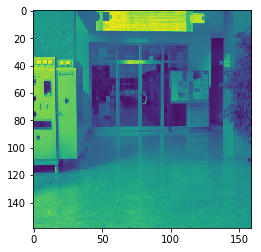

In [22]:
plt.imshow(gt.reshape(159,159))

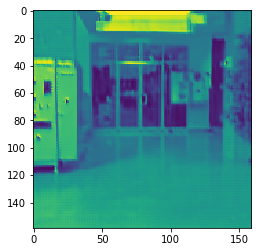

In [26]:
plt.imshow(datas[0].reshape([159,159]))

In [28]:
import cv2
cv2.imwrite("../output_over.png",datas[0].reshape([159,159]))
cv2.imwrite("../gt_over.png",gt.reshape([159,159]))

True

In [44]:
import cv2

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (159,159),isColor=False)
for i in range(len(datas)):
    out.write((datas[0].reshape([159,159])).astype(np.uint8))
out.release()